# <center>ANALYSIS OF RUSSIAN PROPAGANDA ON TWITTER<center>

# Exploratory analysis & descriptive statistics

## Preliminary exploration

In [14]:
r_trolls.head(3)

,id,date,time,user_id,username,name,tweet,language,mentions,photos,replies_count,retweets_count,likes_count,hashtags,link,video,reply_to,views_count
0,1.496820e+18,2022-02-24,14:24:32,255471924.0,mfa_russia,MFA Russia ????,?? President Vladimir Putin: We have to take b...,en,[],['https://pbs.twimg.com/media/FMXIbVpXIAEKNes....,635,315,1243,[],https://twitter.com/mfa_russia/status/14968233...,1,[],31075
1,1.496830e+18,2022-02-24,14:42:53,255471924.0,mfa_russia,MFA Russia ????,?? Vladimir Putin: Over the past 30 years we h...,en,"[{'screen_name': 'nato', 'name': 'nato', 'id':...",['https://pbs.twimg.com/media/FMXKPusXIAMK02H....,1222,946,2881,[],https://twitter.com/mfa_russia/status/14968279...,1,[],72025
2,1.496830e+18,2022-02-24,14:50:06,114718372.0,russianembassy,"Russian Embassy, UK",President #Putin: For 8 years Russia has been ...,en,[],['https://pbs.twimg.com/media/FMXOeDqWQAEsi3F....,269,281,904,"['putin', 'donbass', 'russia']",https://twitter.com/RussianEmbassy/status/1496...,1,[],22600


In [15]:
r_trolls.describe().transpose()[['count', 'mean', 'std', 'min', 'max']]

,count,mean,std,min,max
id,19790.0,1.510494e+18,8.069736e+15,1.496820e+18,1.523820e+18
user_id,19790.0,5.360114e+17,6.101698e+17,2.452299e+07,1.507620e+18
replies_count,19790.0,3.565745e+01,2.277922e+02,0.000000e+00,2.268800e+04
retweets_count,19790.0,5.849186e+01,2.206357e+02,0.000000e+00,1.798000e+04
likes_count,19790.0,2.493897e+02,7.251192e+02,0.000000e+00,5.252800e+04
video,19790.0,2.415867e-01,4.280558e-01,0.000000e+00,1.000000e+00
views_count,19790.0,6.234742e+03,1.812798e+04,0.000000e+00,1.313200e+06


In [16]:
print("###### likes mean ---->", round(np.mean(r_trolls['likes_count']), 2))
print("###### likes median ---->", int(np.median(r_trolls['likes_count'])))
print("###### likes standard deviation ---->", round(np.std(r_trolls['likes_count']), 2))
print("********************************************************************************************")
print("###### retweets mean ---->", round(np.mean(r_trolls['retweets_count']), 2))
print("###### retweets median ---->", round(np.median(r_trolls['retweets_count']), 2))
print("###### retweets standarnd deviation ---->", round(np.std(r_trolls['retweets_count']), 2))
print("********************************************************************************************")
print("###### replies mean ---->", round(np.mean(r_trolls['replies_count']), 2))
print("###### replies median ---->", round(np.median(r_trolls['replies_count']), 2))
print("###### replies standard deviation ---->", round(np.std(r_trolls['replies_count']), 2))
print("********************************************************************************************")
print("###### views mean ---->", round(np.mean(r_trolls['views_count']), 2))
print("###### views median ---->", round(np.median(r_trolls['views_count']), 2))
print("###### views standard deviation ---->", round(np.std(r_trolls['views_count']), 2))

###### likes mean ----> 249.39
###### likes median ----> 41
###### likes standard deviation ----> 725.1
********************************************************************************************
###### retweets mean ----> 58.49
###### retweets median ----> 4.0
###### retweets standarnd deviation ----> 220.63
********************************************************************************************
###### replies mean ----> 35.66
###### replies median ----> 2.0
###### replies standard deviation ----> 227.79
********************************************************************************************
###### views mean ----> 6234.74
###### views median ----> 1025.0
###### views standard deviation ----> 18127.52


## Views / retweets / replies

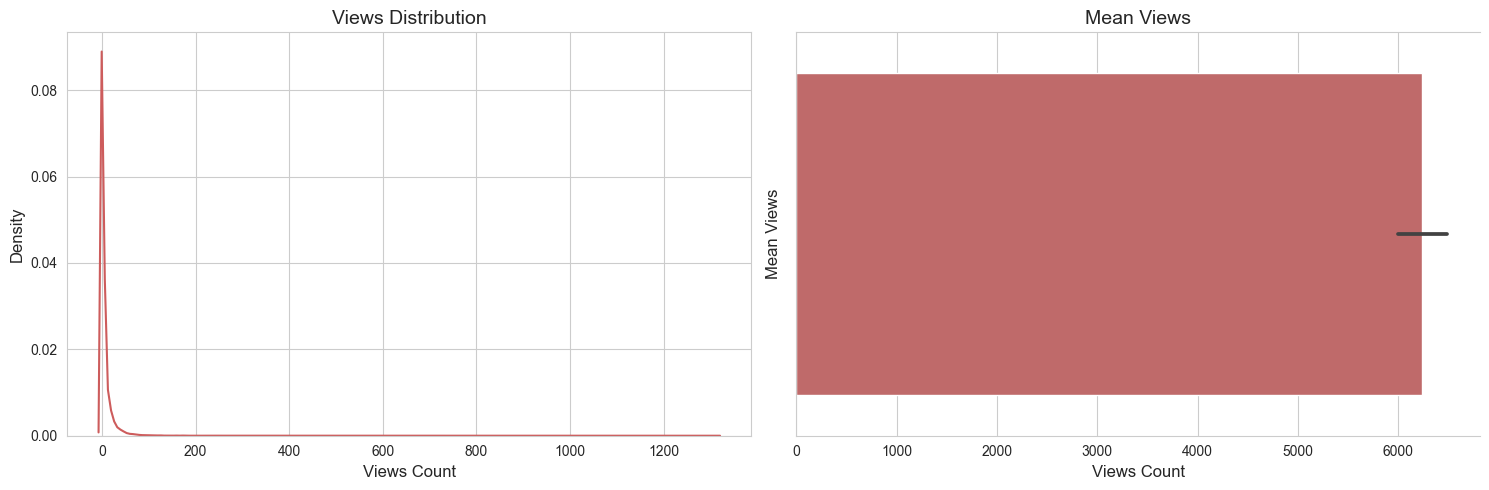

In [17]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

r_copy = r_trolls.copy()
r_copy['views_count'] = r_trolls['views_count'] / 1000  # Normalization in thousands

sns.kdeplot(data=r_copy['views_count'], color='indianred', ax=axs[0])
axs[0].set_title("Views Distribution", fontsize=14)
axs[0].set_xlabel("Views Count", fontsize=12)
axs[0].set_ylabel("Density", fontsize=12)
axs[0].tick_params(axis='both', labelsize=10)

sns.barplot(x='views_count', data=r_trolls, color='indianred', ax=axs[1])
axs[1].set_title("Mean Views", fontsize=14)
axs[1].set_xlabel("Views Count", fontsize=12)
axs[1].set_ylabel("Mean Views", fontsize=12)
axs[1].tick_params(axis='both', labelsize=10)

axs[1].spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

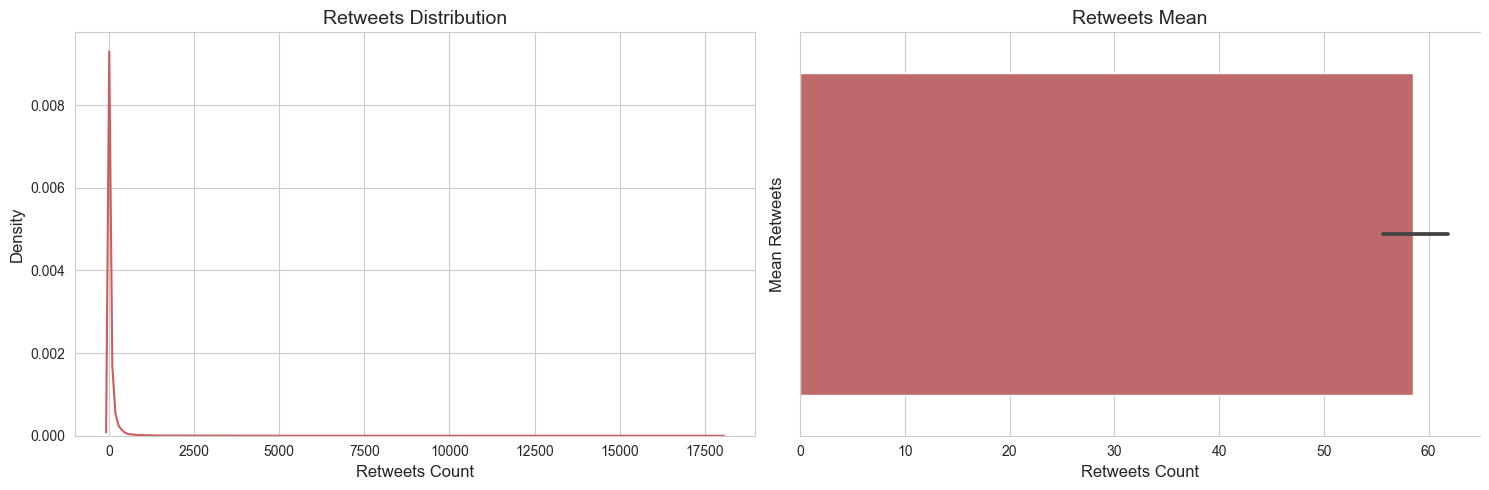

In [18]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

sns.kdeplot(data=r_copy['retweets_count'], color='indianred', ax=axs[0])
axs[0].set_title("Retweets Distribution", fontsize=14)
axs[0].set_xlabel("Retweets Count", fontsize=12)
axs[0].set_ylabel("Density", fontsize=12)
axs[0].tick_params(axis='both', labelsize=10)

sns.barplot(x='retweets_count', data=r_trolls, color='indianred', ax=axs[1])
axs[1].set_title("Retweets Mean", fontsize=14)
axs[1].set_xlabel("Retweets Count", fontsize=12)
axs[1].set_ylabel("Mean Retweets", fontsize=12)
axs[1].tick_params(axis='both', labelsize=10)

axs[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

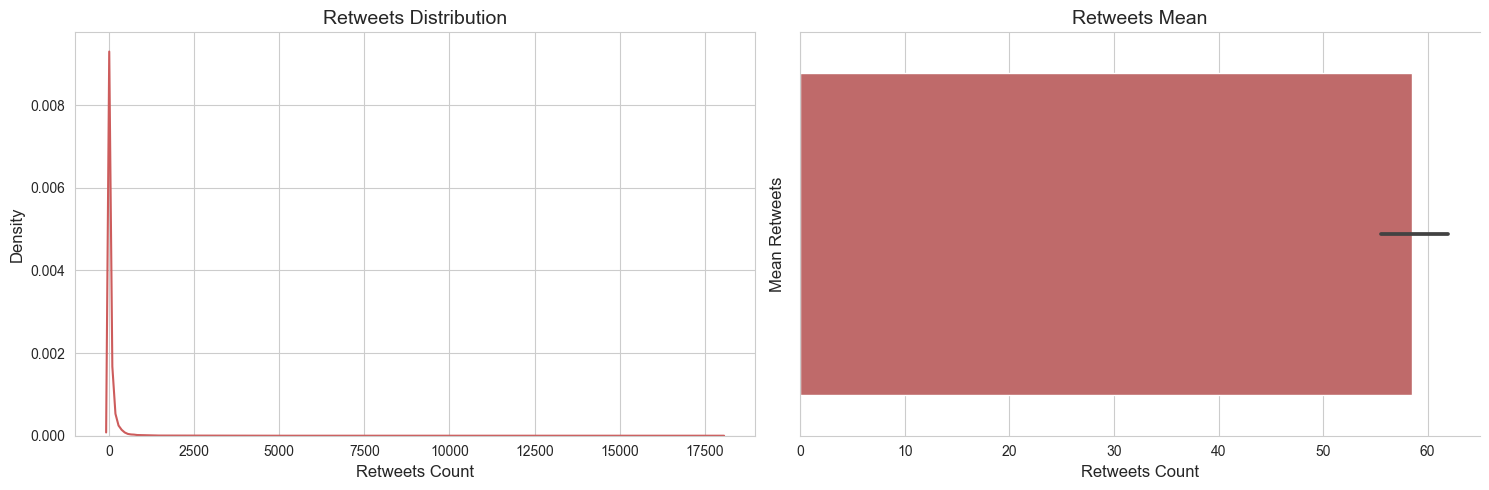

In [19]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

sns.kdeplot(data=r_copy['retweets_count'], color='indianred', ax=axs[0])
axs[0].set_title("Retweets Distribution", fontsize=14)
axs[0].set_xlabel("Retweets Count", fontsize=12)
axs[0].set_ylabel("Density", fontsize=12)
axs[0].tick_params(axis='both', labelsize=10)

sns.barplot(x='retweets_count', data=r_trolls, color='indianred', ax=axs[1])
axs[1].set_title("Retweets Mean", fontsize=14)
axs[1].set_xlabel("Retweets Count", fontsize=12)
axs[1].set_ylabel("Mean Retweets", fontsize=12)
axs[1].tick_params(axis='both', labelsize=10)

axs[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## Hashtags

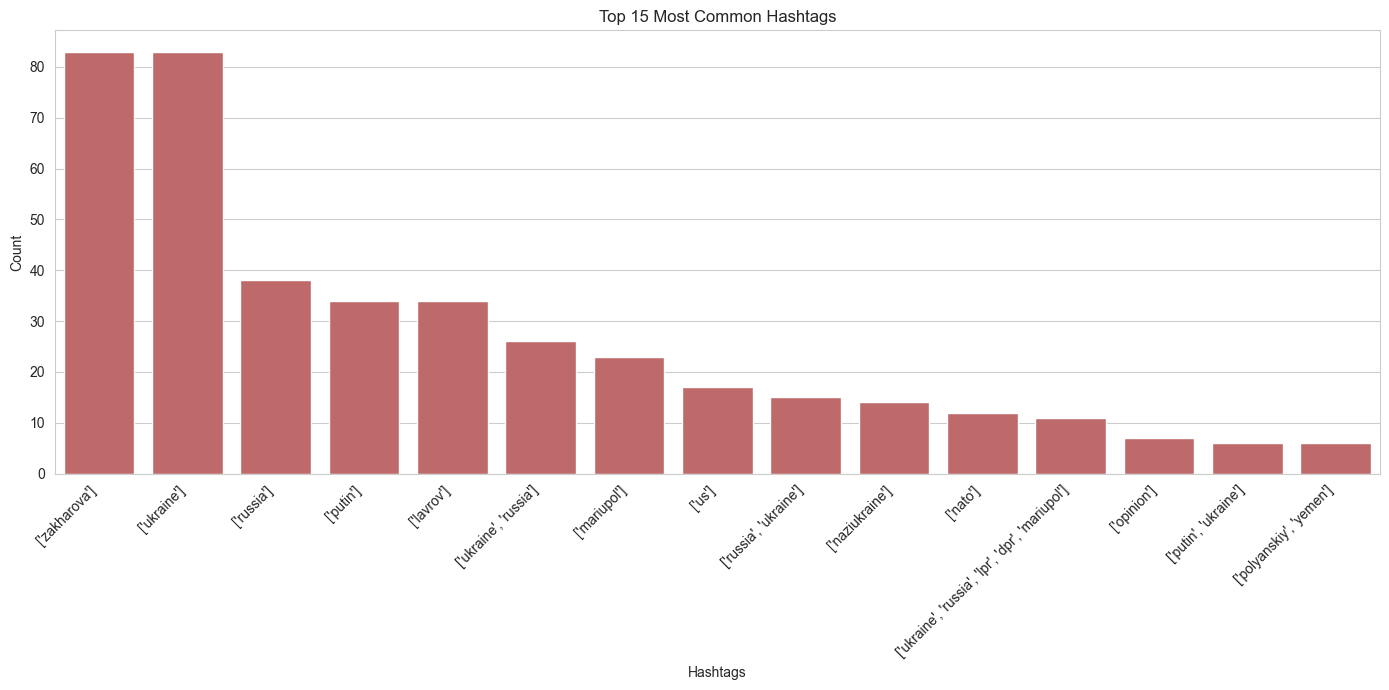

In [20]:
top_15_hashtags = r_trolls['hashtags'].value_counts()[1:16]  # the top 15 most common hashtags

sns.set_style("whitegrid")
sns.set_palette("Set2")

plt.figure(figsize=(14, 7))  
sns.barplot(x=top_15_hashtags.index, y=top_15_hashtags.values, color='indianred')

plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 15 Most Common Hashtags')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Photos/videos usage in propaganda spreading

In [21]:
photos = r_trolls['photos'].to_list()

pho = []
for i in photos:
    if len(i)>4:
        pho.append('photo')
    else:
        pho.append('no photo')
        
r_trolls['photos'] = pho

videos = r_trolls['video'].to_list()

vid = []
for i in videos:
    if i == 0:
        vid.append('no video')
    else:
        vid.append('video')
        
r_trolls['video'] = vid


x = pd.DataFrame(r_trolls.photos.value_counts())
y = pd.DataFrame(r_trolls.video.value_counts())

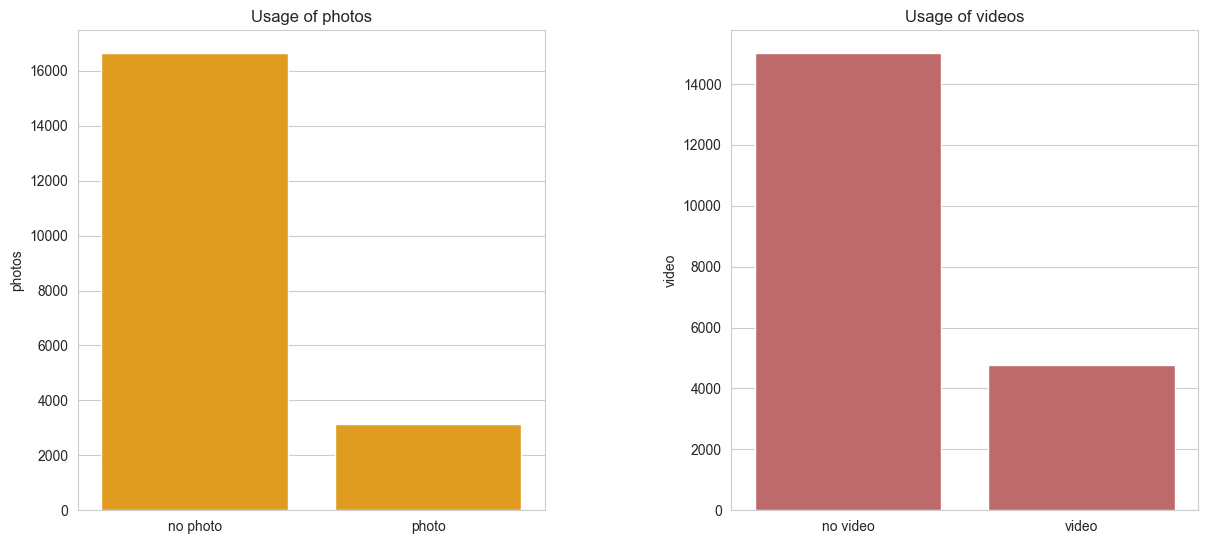

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=x.index, y=x.photos, ax=ax1, color="orange")
sns.barplot(x=y.index, y=y.video, ax=ax2, color="indianred")

ax1.set_title("Usage of photos")
ax2.set_title("Usage of videos")

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

## Accounts exploration

In [23]:
r_tweets_count = r_trolls.groupby('username').count().sort_values(by = 'tweet', ascending = False) # sorted by tweets

r_likes = r_trolls.groupby('username').sum().sort_values(by = 'likes_count', ascending = False) # sorted by likes

r_retweets = r_trolls.groupby('username').sum().sort_values(by = 'retweets_count', ascending = False) # sorted by retweets

r_replies = r_trolls.groupby('username').sum().sort_values(by = 'replies_count', ascending = False) # sorted by replies

r_views = r_trolls.groupby('username').sum().sort_values(by = 'views_count', ascending = False) # sorted by views

### Tweets/accout - Likes/account

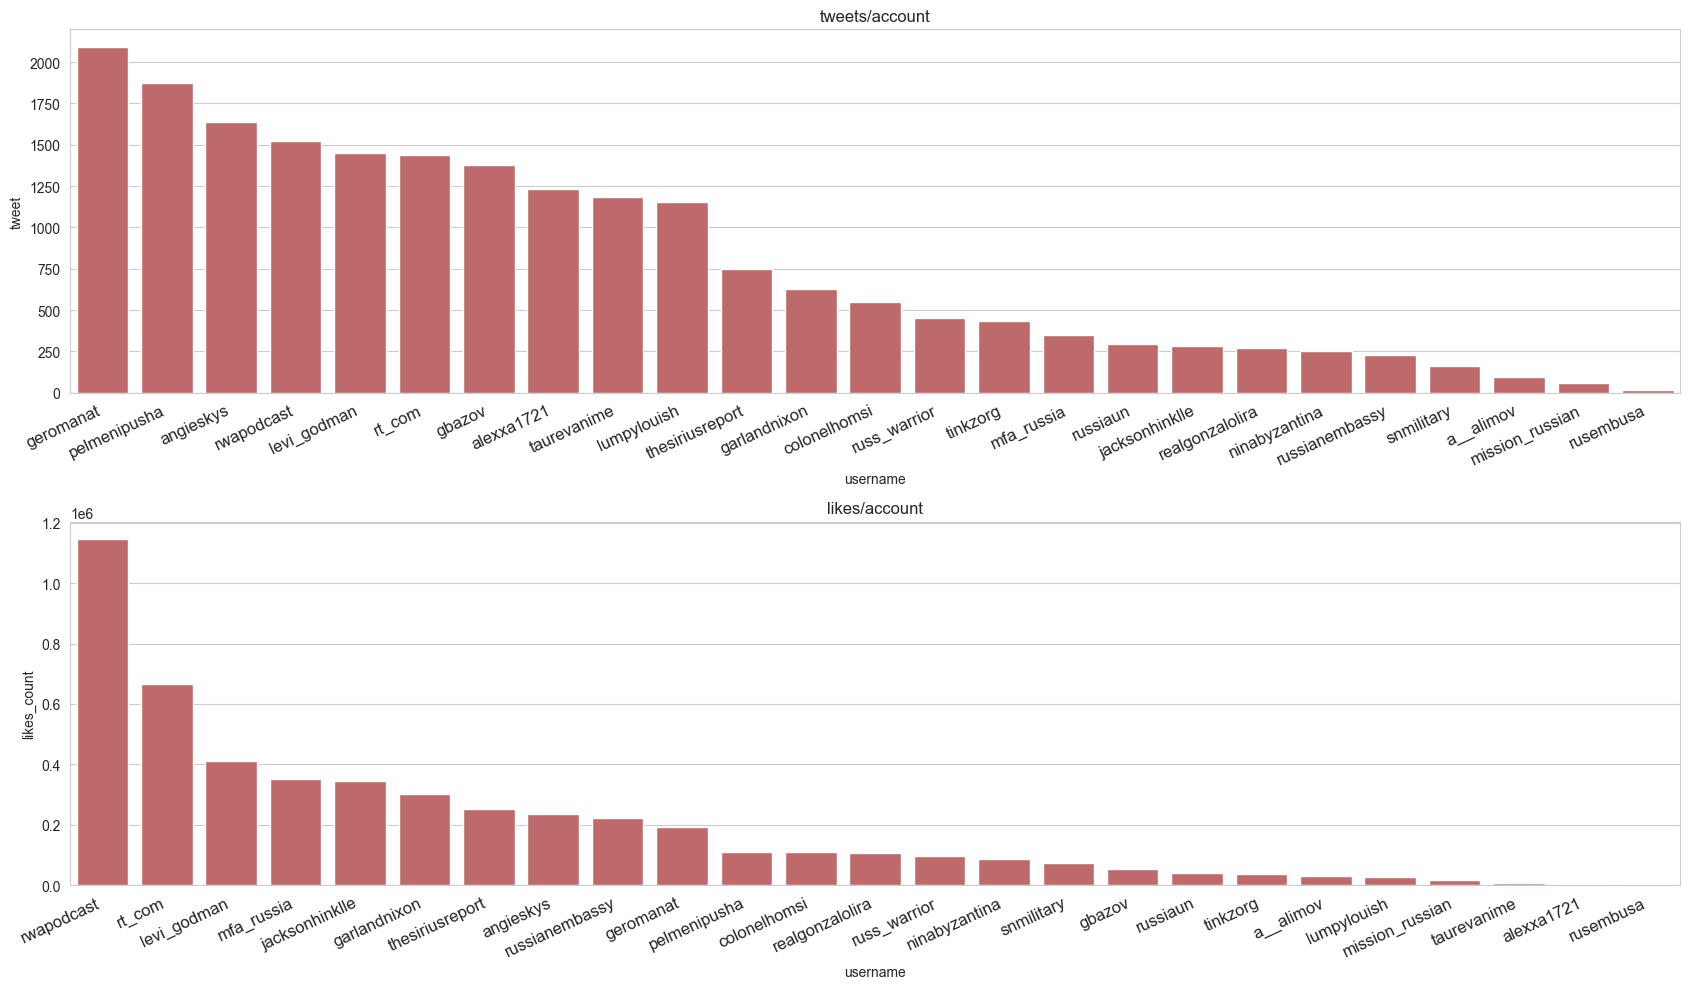

In [24]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(17, 10))

b = sns.barplot(x=r_tweets_count.index, y='tweet', data=r_tweets_count, ax=axs[0], color='indianred')
b.set_xticklabels(b.get_xticklabels(), rotation=25, horizontalalignment='right', fontsize=12)  # Increase fontsize here
b.set_title('tweets/account')

a = sns.barplot(x=r_likes.index, y='likes_count', data=r_likes, ax=axs[1], color='indianred')
a.set_xticklabels(a.get_xticklabels(), rotation=25, horizontalalignment='right', fontsize=12)  # Increase fontsize here
a.set_title('likes/account')

plt.tight_layout()
plt.show()

### Retweets/account - Replies/account

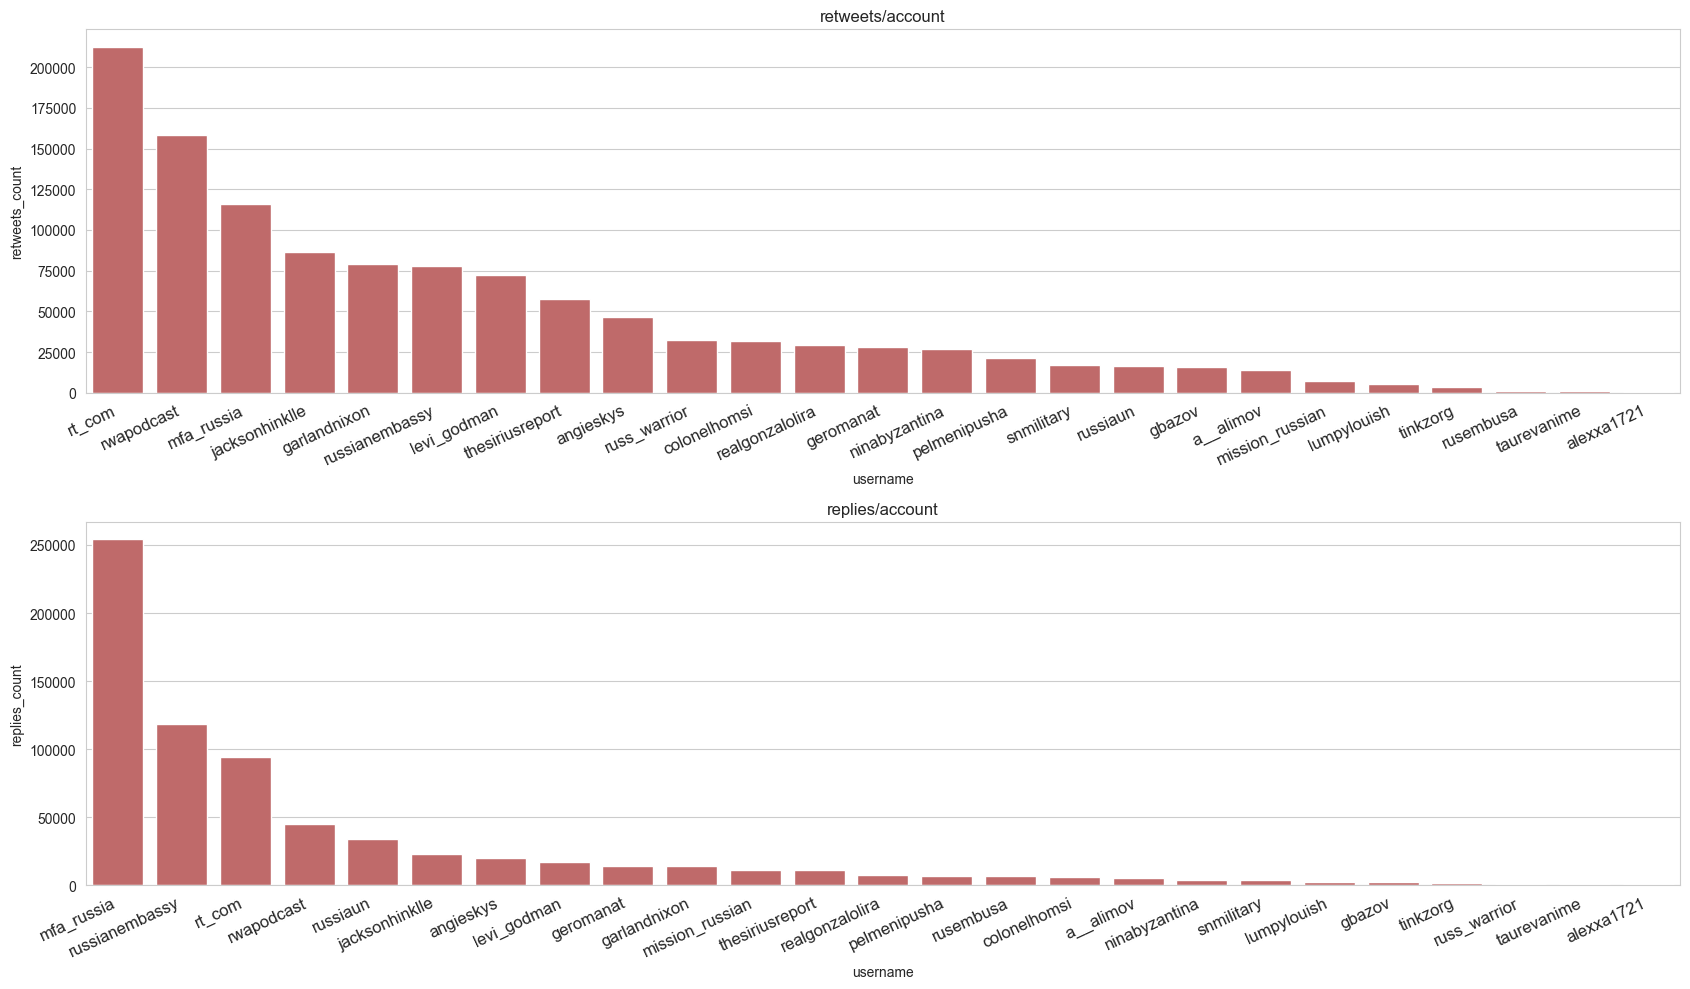

In [25]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(17, 10))

b = sns.barplot(x=r_retweets.index, y='retweets_count', data=r_retweets, ax=axs[0], color='indianred')
b.set_xticklabels(b.get_xticklabels(), rotation=25, horizontalalignment='right', fontsize=12)  # Increase fontsize here
b.set_title('retweets/account')

a = sns.barplot(x=r_replies.index, y='replies_count', data=r_replies, ax=axs[1], color='indianred')
a.set_xticklabels(a.get_xticklabels(), rotation=25, horizontalalignment='right', fontsize=12)  # Increase fontsize here
a.set_title('replies/account')

plt.tight_layout()
plt.show()

### Accounts popularity

6235


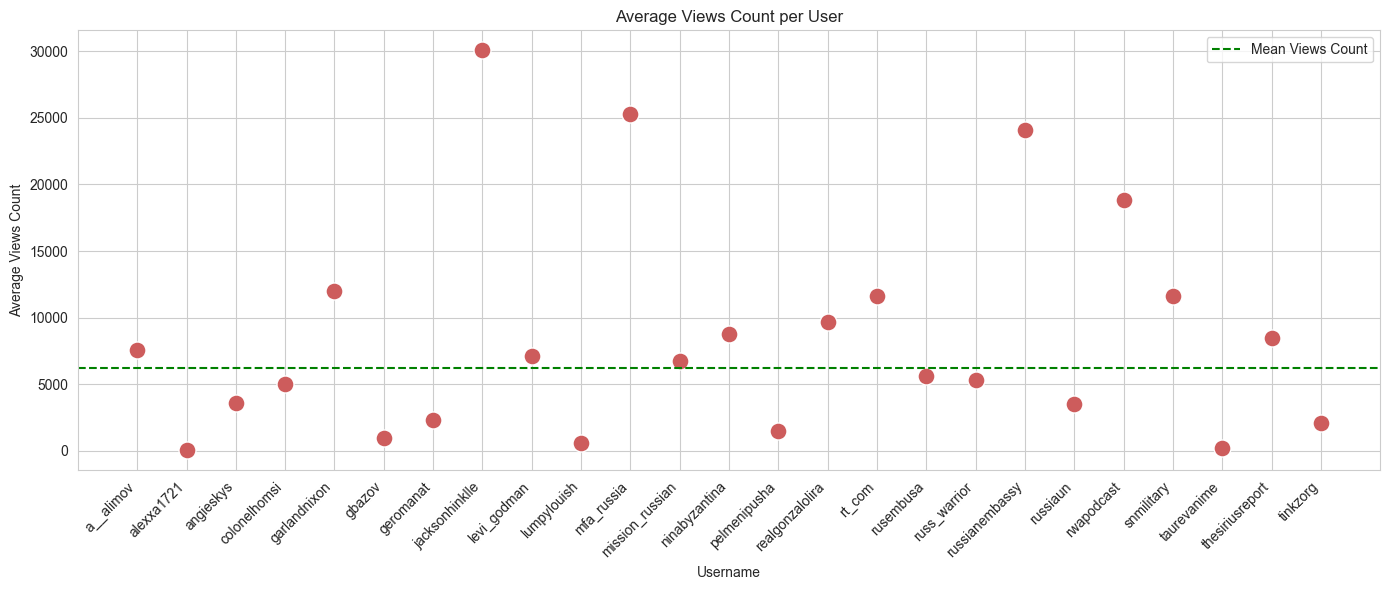

In [26]:
print(round(np.mean(r_trolls.views_count)))
userviews = pd.DataFrame(r_trolls.groupby('username').views_count.mean())
userviews.reset_index(inplace=True)

mean_views_count = round(np.mean(r_trolls.views_count))

plt.figure(figsize=(14, 6))
sns.scatterplot(x='username', y='views_count', data=userviews, s=150, color='indianred')
plt.axhline(mean_views_count, color='green', linestyle='dashed', label='Mean Views Count')
plt.xticks(rotation=45, ha='right')

plt.xlabel('Username')
plt.ylabel('Average Views Count')
plt.title('Average Views Count per User')
plt.legend()
plt.tight_layout()
plt.show()

## Exploring tweets

### Top 10 most liked tweets

In [27]:
for tweet in r_trolls.sort_values(by = 'likes_count', ascending = False)['tweet'][:10]:
    print(tweet)
    print("*******************************************************************************************************************")

10 wars, 6 million deaths, 0 sanctions.
*******************************************************************************************************************
President #Putin: Illegitimate freezing of some of the currency reserves of the Bank of Russia marks the end of reliability of so-called first-class assets. #US and #EU have defaulted their obligations to #Russia. Now everybody knows that financial reserves can simply be stolen.  https://t.co/XJlUGj2YNs
*******************************************************************************************************************
Rand Paul   Do you know who is the greatest propagator of disinformation in the history of the world?  US government.  https://t.co/GfLo0WumlM
*******************************************************************************************************************
US Congress: Flint water supply fix - 9 Billion (can't afford it) Ukraine Weapons - 14 Billion (took 3 days to approved)
*****************************************

### Top 10 most retweeted tweets

In [28]:
for tweet in r_trolls.sort_values(by = 'retweets_count', ascending = False)['tweet'][:10]:
    print(tweet)
    print("*******************************************************************************************************************")

10 wars, 6 million deaths, 0 sanctions.
*******************************************************************************************************************
President #Putin: Illegitimate freezing of some of the currency reserves of the Bank of Russia marks the end of reliability of so-called first-class assets. #US and #EU have defaulted their obligations to #Russia. Now everybody knows that financial reserves can simply be stolen.  https://t.co/XJlUGj2YNs
*******************************************************************************************************************
Rand Paul   Do you know who is the greatest propagator of disinformation in the history of the world?  US government.  https://t.co/GfLo0WumlM
*******************************************************************************************************************
US Congress: Flint water supply fix - 9 Billion (can't afford it) Ukraine Weapons - 14 Billion (took 3 days to approved)
*****************************************

### Top 10 tweets with most replies

In [29]:
for tweet in r_trolls.sort_values(by = 'replies_count', ascending = False)['tweet'][:10]:
    print(tweet)
    print("*******************************************************************************************************************")

FM #Lavrov: The goal of Russias special military operation is to stop any war that could take place on Ukrainian territory or that could start from there.  https://t.co/tLf7798DIh
*******************************************************************************************************************
??We have taken notice of an unprecedented level of Russophobia in several foreign countries in the context of the special military operation in Ukraine.  ?? Rest assured, we are taking note of all these incidents.  ??  https://t.co/RrhhThZRHV  https://t.co/9nfHg3iKtZ
*******************************************************************************************************************
??#Zakharova: We regard the Finnish governments commitment to a military non-alignment policy as an important factor in ensuring security and stability in northern Europe.     ??Finlands accession to @NATO would have serious military and political repercussions.  https://t.co/eCY5oG23rL
****************************

## Time series analysis

### Tweets/day

In [30]:
bydate_r = r_trolls.groupby("date").count()

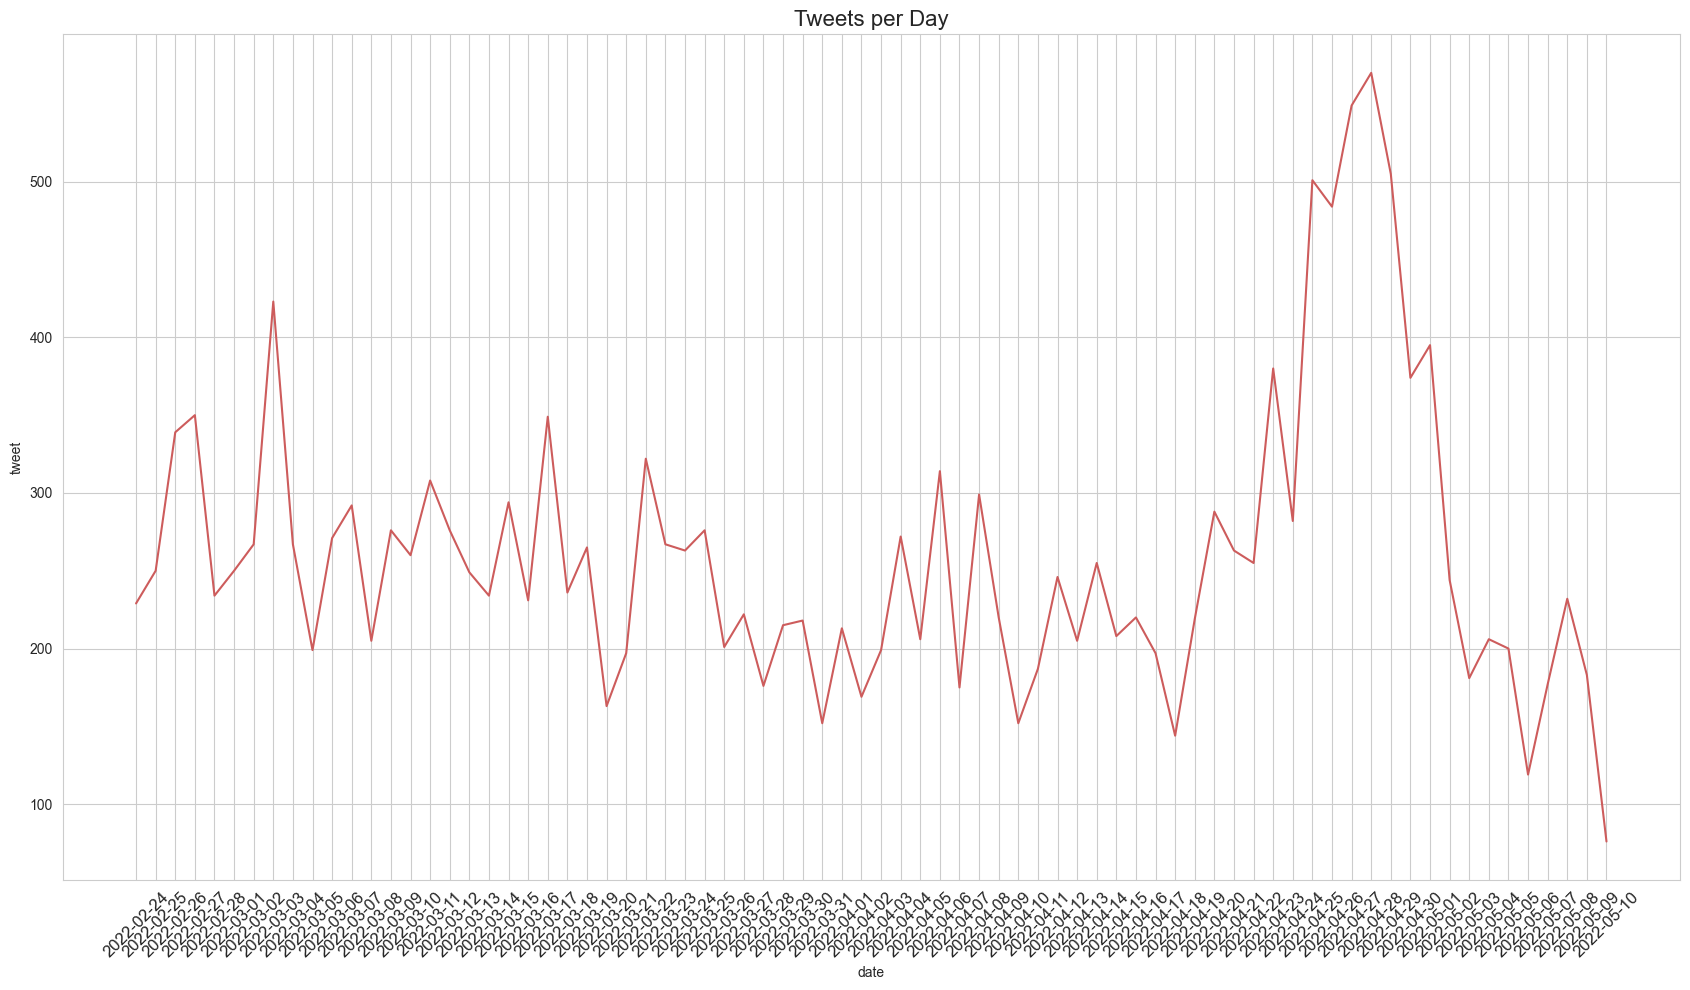

In [31]:
fig = plt.figure(figsize=(17, 10))

a = sns.lineplot(x=bydate_r.index, y='tweet', data=bydate_r, color='indianred')
a.tick_params(axis='x', rotation=45, labelsize=12) 
a.set_title("Tweets per Day", fontsize=16) 

plt.xticks(bydate_r.index, bydate_r.index.strftime('%Y-%m-%d'), rotation=45)

plt.tight_layout()
plt.show()

### Views/day

In [32]:
bydate_r2 = r_trolls.groupby("date").sum()

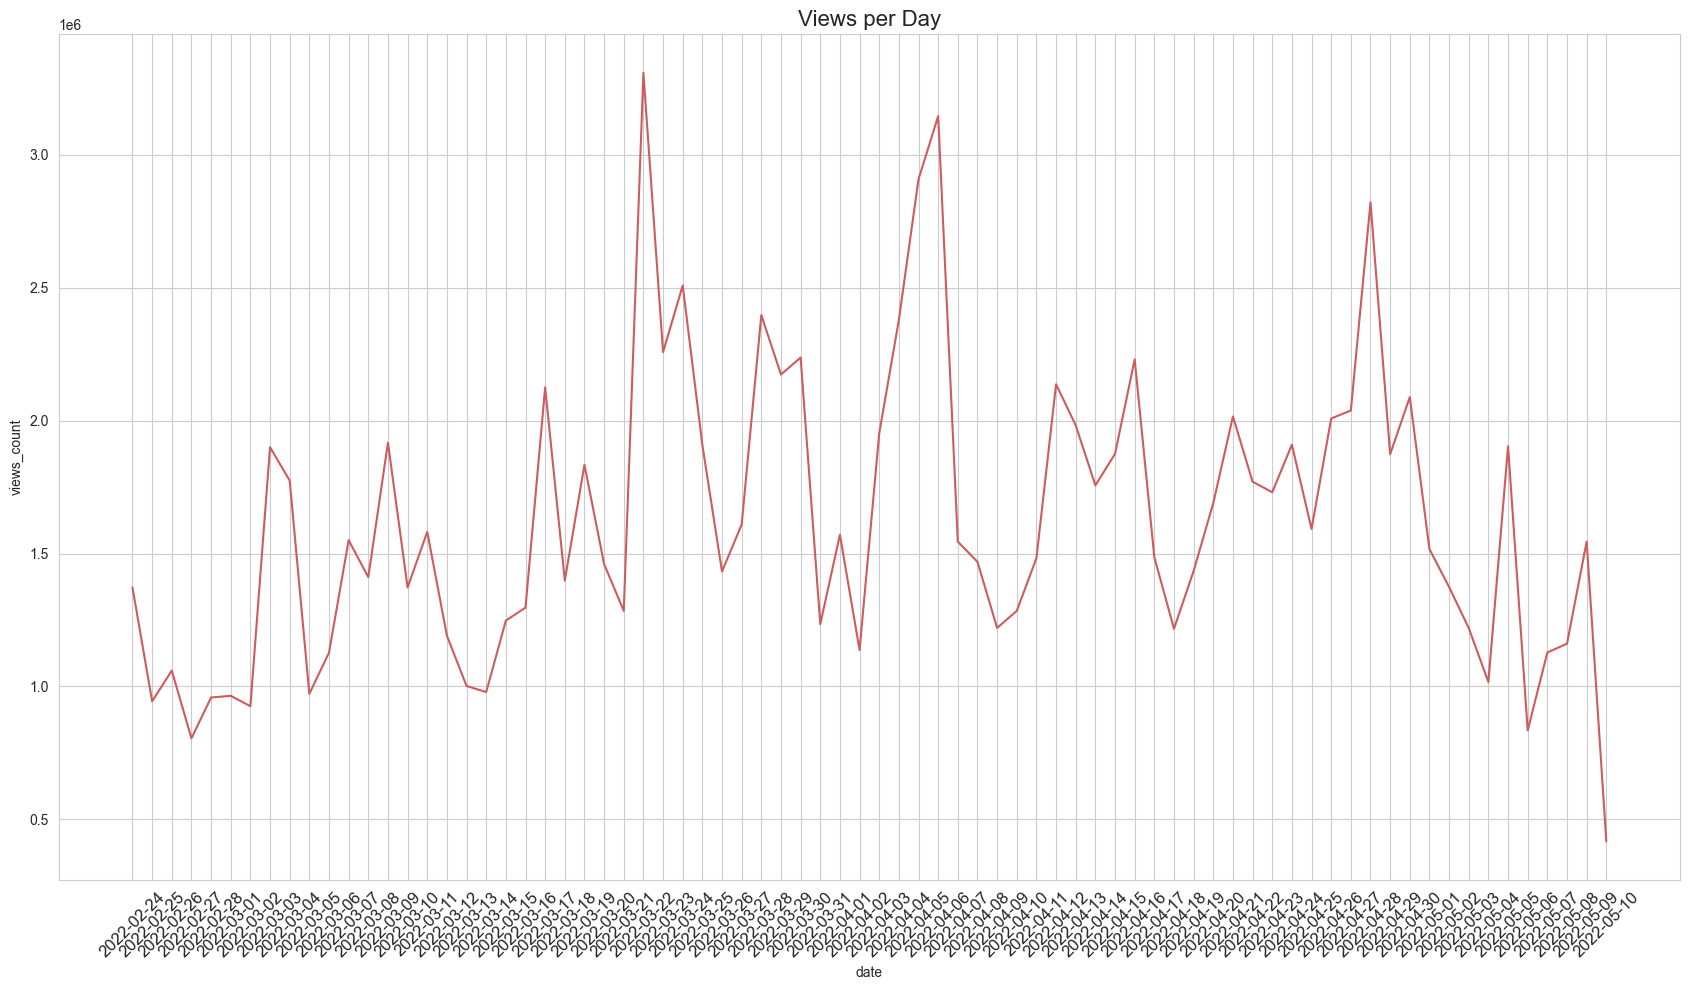

In [33]:
fig = plt.figure(figsize=(17, 10))

a = sns.lineplot(x=bydate_r2.index, y='views_count', data=bydate_r2, color='indianred')
a.tick_params(axis='x', rotation=45, labelsize=12)
a.set_title("Views per Day", fontsize=16) 

plt.xticks(bydate_r2.index, bydate_r2.index.strftime('%Y-%m-%d'), rotation=45)

plt.tight_layout()
plt.show()

### Retweets/day

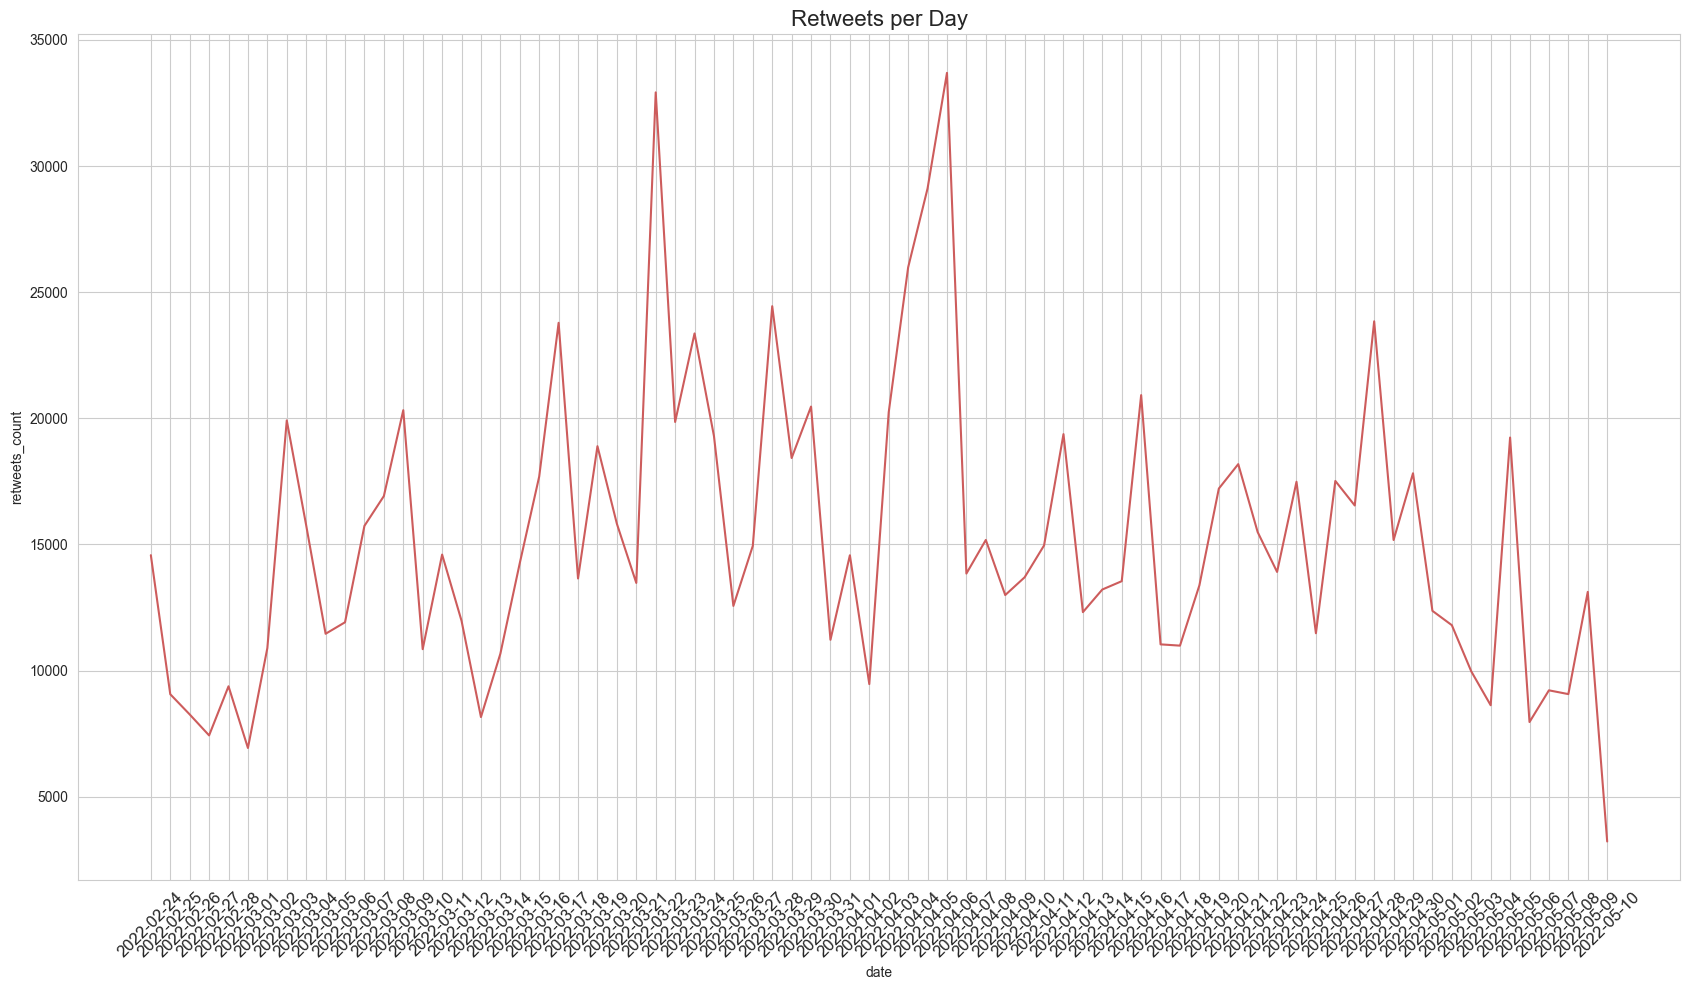

In [34]:
fig = plt.figure(figsize=(17, 10))

a = sns.lineplot(x=bydate_r2.index, y='retweets_count', data=bydate_r2, color='indianred')
a.tick_params(axis='x', rotation=45, labelsize=12)
a.set_title("Retweets per Day", fontsize=16)

plt.xticks(bydate_r2.index, bydate_r2.index.strftime('%Y-%m-%d'), rotation=45)

plt.tight_layout()
plt.show()

### Replies/day

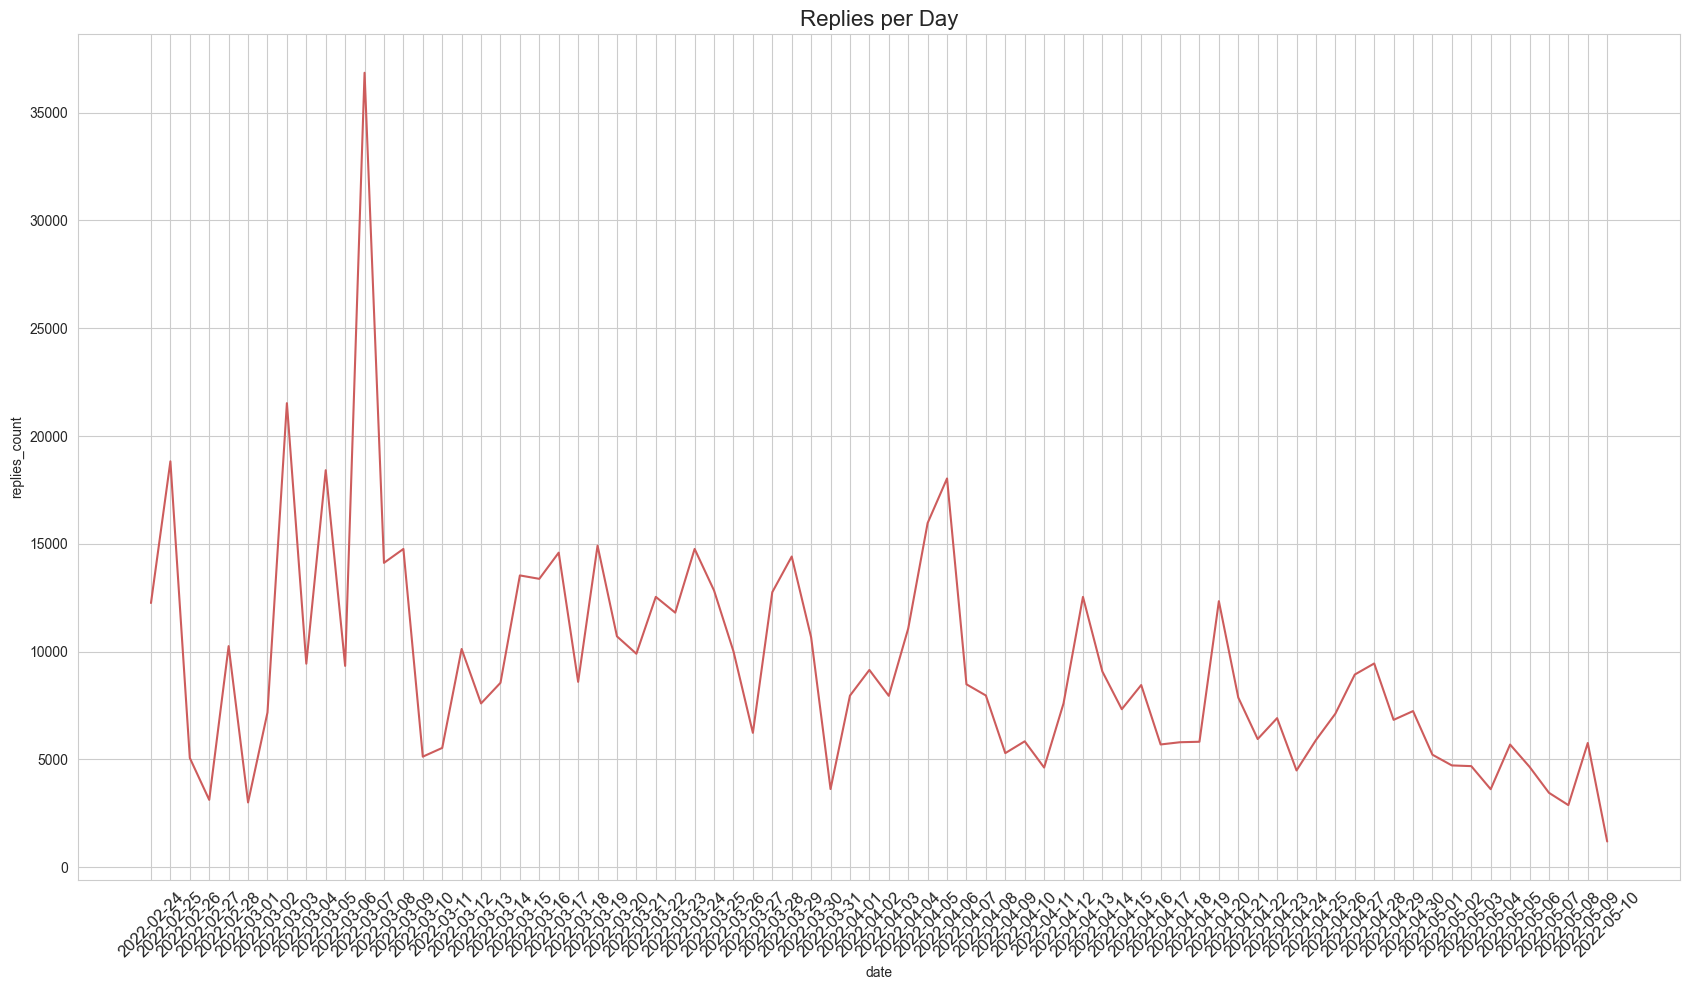

In [35]:
fig = plt.figure(figsize=(17, 10))

a = sns.lineplot(x=bydate_r2.index, y='replies_count', data=bydate_r2, color='indianred')
a.tick_params(axis='x', rotation=45, labelsize=12)
a.set_title("Replies per Day", fontsize=16)

plt.xticks(bydate_r2.index, bydate_r2.index.strftime('%Y-%m-%d'), rotation=45)

plt.tight_layout()
plt.show()